In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline
sns.set(style="whitegrid")


In [2]:
#  2. Load the Dataset
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#  3. Overview of Data
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:")
df.info()

print("\nSummary Statistics:")
df.describe(include='all')

Shape: (418, 12)

Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB

Summary Statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN



Missing Values:
 Age       86
Fare       1
Cabin    327
dtype: int64


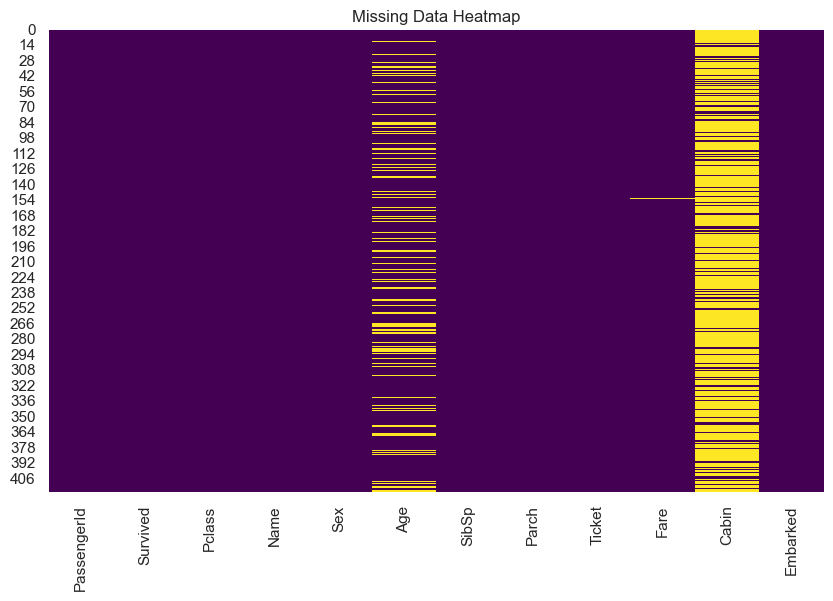

In [4]:
#  4. Checking Missing Data
missing = df.isnull().sum()
print("\nMissing Values:\n", missing[missing > 0])

# Visualizing missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [5]:
#  5. Handling Missing Data

# Example: Fill numeric with median, categorical with mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

# Check again
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\kalya\AppData\Local\Temp\ipykernel_14024\1147419852.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\kalya\AppData\Local\Temp\ipykernel_14024\1147419852.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Text(0.5, 1.0, 'Boxplot: Age by Sex')

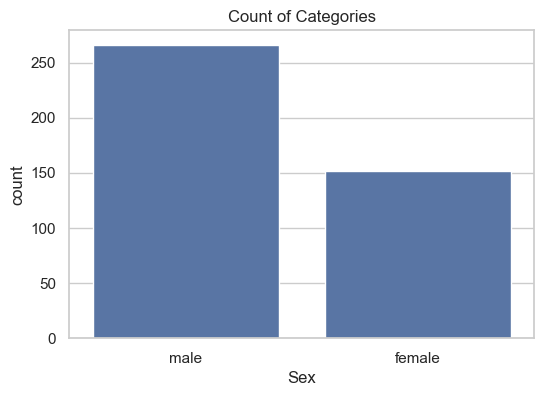

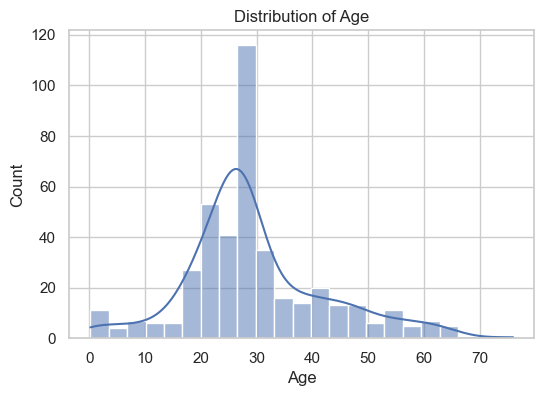

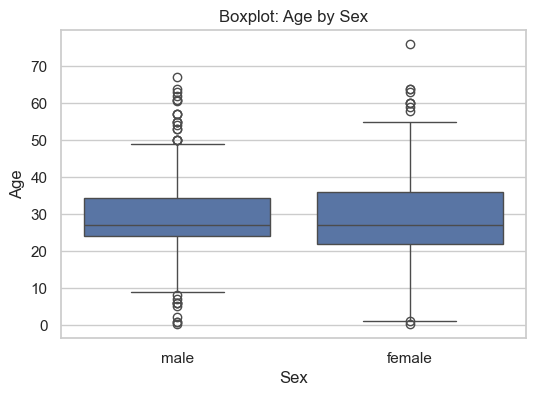

In [6]:
#  6. Visualization

# Countplot for a categorical column (edit based on actual columns)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex')  # Replace 'Sex' with actual categorical column
plt.title("Count of Categories")

# Distribution of numerical column
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)  # Replace 'Age' with numeric column
plt.title("Distribution of Age")

# Boxplot by category
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Sex', y='Age')  # Replace as needed
plt.title("Boxplot: Age by Sex")

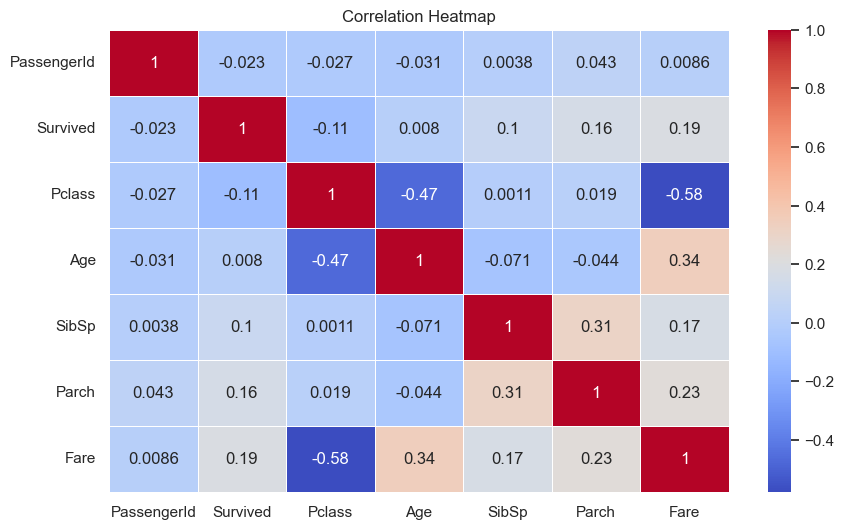

In [7]:
#  7. Correlation & Heatmap
plt.figure(figsize=(10,6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

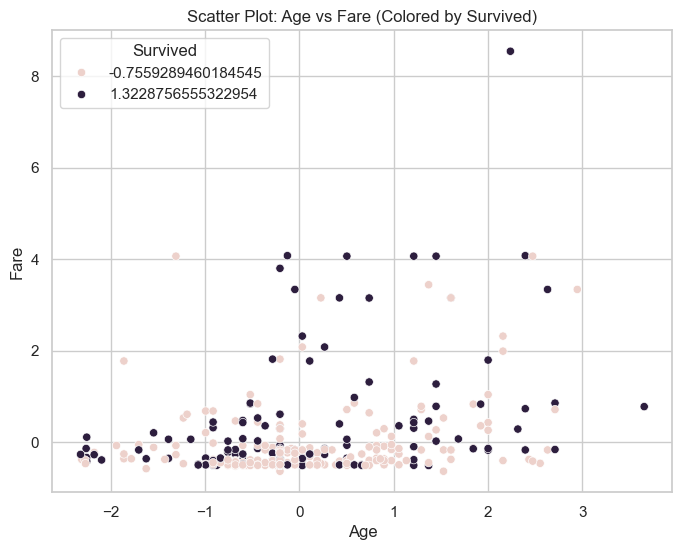

In [11]:
#  Scatter Plot with Hue (e.g., based on Survival or Gender)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')  # Replace 'Survived' with your categorical column
plt.title('Scatter Plot: Age vs Fare (Colored by Survived)')
plt.show()

In [8]:
#  8. Encoding Categorical Variables

# Label Encoding for binary columns
label_enc = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    if df[column].nunique() == 2:
        df[column] = label_enc.fit_transform(df[column])

# One-Hot Encoding for others
df = pd.get_dummies(df, drop_first=True)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen",...,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_Q,Embarked_S
0,892,0,3,1,34.5,0,0,7.8292,False,False,...,False,False,False,False,False,False,False,False,True,False
1,893,1,3,0,47.0,1,0,7.0000,False,False,...,False,False,False,False,False,False,False,False,False,True
2,894,0,2,1,62.0,0,0,9.6875,False,False,...,False,False,False,False,False,False,False,False,True,False
3,895,0,3,1,27.0,0,0,8.6625,False,False,...,False,False,False,False,False,False,False,False,False,True
4,896,1,3,0,22.0,1,1,12.2875,False,False,...,False,False,False,False,False,False,False,False,False,True


In [9]:
# 9. Feature Scaling

scaler = StandardScaler()
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen",...,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_Q,Embarked_S
0,-1.727912,-0.755929,0.873482,0.755929,0.386231,-0.499470,-0.400248,-0.497413,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-1.719625,1.322876,0.873482,-1.322876,1.371370,0.616992,-0.400248,-0.512278,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-1.711337,-0.755929,-0.315819,0.755929,2.553537,-0.499470,-0.400248,-0.464100,False,False,...,False,False,False,False,False,False,False,False,True,False
3,-1.703050,-0.755929,0.873482,0.755929,-0.204852,-0.499470,-0.400248,-0.482475,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-1.694763,1.322876,0.873482,-1.322876,-0.598908,0.616992,0.619896,-0.417492,False,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
# 10. Final Dataset Summary
print("Final Shape:", df.shape)
print("Final Columns:\n", df.columns)

Final Shape: (418, 864)
Final Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Name_Abelseth, Miss. Karen Marie',
       'Name_Abelseth, Mr. Olaus Jorgensen',
       ...
       'Cabin_F', 'Cabin_F E46', 'Cabin_F E57', 'Cabin_F G63', 'Cabin_F2',
       'Cabin_F33', 'Cabin_F4', 'Cabin_G6', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=864)
